In [42]:
import numpy as np
import matplotlib.pyplot as plt

48502
10000
min read length : 40
max read length : 354
avg read length : 108.8399


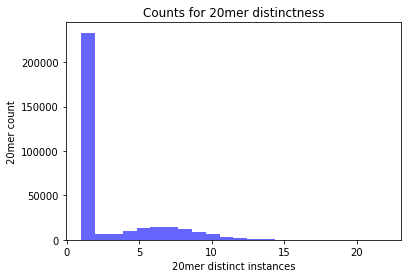

In [59]:
# ==============================================================================

#Problem 2.1.3

#a) TODO: Write code that reads the lambda_virus.fa file and counts the length of the genome

contents = ''
with open('./lambda_virus.fa', 'r') as f :
    headerinfo = f.readline()
    line = f.readline()
    while line:
       contents += line[0:len(line) - 1] # strip newline char
       line = f.readline()

print(len(contents))

#b) TODO: Write code that reads the reads_1.fq file and counts the number of reads
reads = []
with open('./reads_1.fq', 'r') as f :
    line = f.readline()
    while line:
        read = f.readline()
        reads.append(read[0:len(read) - 1])
        line = f.readline()
        line = f.readline()
        line = f.readline()
print(len(reads))

#c) TODO: Write code that reads the reads_1.fq file and computes the min, max and avg read length (line 2, 6, 10, ...)
lengths = [len(i) for i in reads]
print('min read length : ' + str(min(lengths)))
print('max read length : ' + str(max(lengths)))
print('avg read length : ' + str(sum(lengths) / len(lengths)))

#d) TODO: Write code that plots a histogram of distinct 20-mer occurrence counts across all reads
dict20 = dict()
for r in reads:
    if(len(r) < 20):
        continue
    for i in range(0, len(r) - 20):
        mer = r[i:i+20]
        if mer in dict20:
            dict20[mer] += 1
        else:
            dict20[mer] = 1

ctdict = dict()
for k in dict20.keys():
    ct = dict20[k]
    if ct in ctdict:
        ctdict[ct] += 1
    else:
        ctdict[ct] = 1

n, bins, patches = plt.hist(dict20.values(), len(ctdict.keys()), facecolor='blue', alpha=0.6)
plt.xlabel('20mer distinct instances')
plt.ylabel('20mer count');
plt.title('Counts for 20mer distinctness')
plt.show()
# ==============================================================================

In [78]:
#Helper code

#Read in raw (unaligned) reads
read_file_name = 'reads_1.fq'
read_dict = {}

with open(read_file_name) as f :
    read_key = ''
    for line_num, line in enumerate(f) :
        if line_num % 4 == 0 :
            read_key = line.strip().replace('@', '')
        if line_num % 4 == 1 :
            read_dict[read_key] = line.strip()


#Read in genome
genome_file_name = 'lambda_virus.fa'
genome_sequence = ''

with open(genome_file_name) as f :
    #Dummy read first line
    f.readline()    
    for line in f :
        genome_sequence += line.strip()

print('Genome sequence = ' + str(genome_sequence[:20]) + "...")
print('Read 1 = ' + str(read_dict['r1']))
print("")

#Read in Bowtie alignment
alignment_file_name = 'lambda_phage_alignment_norc.sam'

bowtie_align_dict = {}

trash_position_dict = {0 : True}

with open(alignment_file_name, 'r') as f :
    for line in f :
        lineparts = line.strip().split('\t')
        if len(lineparts) < 7 :
            continue        
        if int(lineparts[3]) not in trash_position_dict :
            bowtie_align_dict[lineparts[0]] = int(lineparts[3])

print('Size of bowtie alignment dictionary = ' + str(len(bowtie_align_dict)))
print('Read 1 align position (bowtie) = ' + str(bowtie_align_dict['r1']))
print('Read 2 align position (bowtie) = ' + str(bowtie_align_dict['r2']))

Genome sequence = GGGCGGCGACCTCGCGGGTT...
Read 1 = TGAATGCGAACTCCGGGACGCTCAGTAATGTGACGATAGCTGAAAACTGTACGATAAACNGTACGCTGAGGGCAGAAAAAATCGTCGGGGACATTNTAAAGGCGGCGAGCGCGGCTTTTCCG

Size of bowtie alignment dictionary = 4656
Read 1 align position (bowtie) = 18401
Read 2 align position (bowtie) = 8886


In [126]:
#Code for Problem 2.2.1

match = 2
mismatch = -2
gap = -3

def comp(s1, s2):
    if s1 == s2:
        return match
    else:
        return mismatch

#Standard Smith Waterman Local Alignment with traceback and fixed gap penalty
def local_alignment(seq1, seq2) :
    m, n = len(seq1), len(seq2)

    # ==============================================================================
    
    #TODO: Implement the Smith Waterman Local Alignment algorithm here
    
    # ==============================================================================
    
    max_score, start_pos_1, start_pos_2, seq1_aligned, seq2_aligned = 0, 1, 1, '', ''
    
    f =  np.zeros((m + 1, n + 1), dtype=int)
    h =  [['' for i in range(n + 1)] for j in range(m + 1)]
    for x in range(1, m + 1):
        for y in range(1, n + 1):
            f[x][y] = max(0, max(f[x-1][y] + gap, max(f[x][y-1] + gap, f[x-1][y-1] + comp(seq1[x-1], seq2[y-1]))))
            if 0 > f[x-1][y] + gap and 0 > f[x][y-1] + gap and 0 > f[x-1][y-1] + comp(seq1[x-1], seq2[y-1]):
                h[x][y] = 'start'
            elif f[x-1][y] + gap > f[x][y-1] + gap and f[x-1][y] + gap > f[x-1][y-1] + comp(seq1[x-1], seq2[y-1]):
                h[x][y] = 'left'
            elif f[x][y-1] + gap > f[x-1][y-1] + comp(seq1[x-1], seq2[y-1]):
                h[x][y] = 'up'
            else:
                h[x][y] = 'diag'
    
    max_score = 0
    max_m = 0
    max_n = 0
    for x in range(1, m + 1):
        for y in range(1, n + 1):
            if f[x][y] > max_score:
                max_score = f[x][y]
                max_m = x
                max_n = y
    tmp_m = max_m
    tmp_n = max_n
    while(f[tmp_m][tmp_n] > 0):
        if h[tmp_m][tmp_n] == 'left':
            seq1_aligned = seq1[tmp_m - 1] + seq1_aligned
            seq2_aligned = '-' + seq2_aligned
            tmp_m -= 1
        elif h[tmp_m][tmp_n] == 'up':
            seq1_aligned = '-' + seq1_aligned
            seq2_aligned = seq2[tmp_n - 1] + seq2_aligned
            tmp_n -= 1
        elif h[tmp_m][tmp_n] == 'diag':
            seq1_aligned = seq1[tmp_m - 1] + seq1_aligned
            seq2_aligned = seq2[tmp_n - 1] + seq2_aligned
            tmp_m -= 1
            tmp_n -= 1
        elif h[tmp_m][tmp_n] == 'start':
            break
    
    return max_score, (tmp_m + 1, tmp_n + 1), (seq1_aligned, seq2_aligned)


In [127]:
# ==============================================================================

#Problem 2.2.1

#TODO: call the local_alignment function on the first two raw reads (id 'r1' and 'r2') in read_dict
#Compare the aligned start positions against the positions in bowtie_align_dict

# ==============================================================================
r1 = read_dict['r1']
r2 = read_dict['r2']

#score, (pos1, pos2), (seq1, seq2) = local_alignment('GGGGTTAAAA', 'TGGGGAAAA')

print('******** r1 ********')
score, (pos1, pos2), (seq1, seq2) = local_alignment(r1, genome_sequence)
print('max score : ' + str(score))
print(seq1)
print(seq2)
print('start pos1 : ' + str(pos1) + ', start pos 2 : ' + str(pos2))

print()
print('******** r2 ********')
score, (pos1, pos2), (seq1, seq2) = local_alignment(r2, genome_sequence)
print('max score : ' + str(score))
print(seq1)
print(seq2)
print('start pos1 : ' + str(pos1) + ', start pos 2 : ' + str(pos2))


******** r1 ********
max score : 232
TGAATGCGAACTCCGGGACGCTCAGTAATGTGACGATAGCTGAAAACTGTACGATAAACNGTACGCTGAGGGCAGAAAAAATCGTCGGGGACATTNTAAAGGCGGCGAGCGCGGCTTTTCCG
TGAATGCGAACTCCGGGACGCTCAGTAATGTGACGATAGCTGAAAACTGTACGATAAACGGTACGCTGAGGGCGGAAAAAATCGTCGGGGACATTGTAAAGGCGGCGAGCGCGGCTTTTCCG
start pos1 : 1, start pos 2 : 18401

******** r2 ********
max score : 526
TGATGCGGGCTTGTGGAGTTCAGCCGATCTGACTTATGTCATTACCTATGAAATGTGAGGACGCTATGCCTGTACCAAATCCTACAATGCCGGTGAAAGGTGCCGGGATCACCCTGTGGGTTTATAAGGGGATCGGTGACCCCTACGCGAATCCGCTTTCAGACGTTGACTGGTCGCGTCTGGCAAAAGTTAAAGACCTGACGCCCGGCGAACTGACCGCTGAGNCCTATGACGACAGCTATCTCGATGATGAAGATGCAGACTGGACTGC
TGATGCGGGCTTGTGGAGTTCAGCCGATCTGACTTATGTCATTACCTATGAAATGTGAGGACGCTATGCCTGTACCAAATCCTACAATGCCGGTGAAAGGTGCCGGGACCACCCTGTGGGTTTATAAGGGGAGCGGTGACCCTTACGCGAATCCGCTTTCAGACGTTGACTGGTCGCGTCTGGCAAAAGTTAAAGACCTGACGCCCGGCGAACTGACCGCTGAGTCCTATGACGACAGCTATCTCGATGATGAAGATGCAGACTGGACTGC
start pos1 : 5, start pos 2 : 8890
